In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/home/cc/clio/drift-detection/output/drifts.csv')
data = data.loc[data['time_split'] == '1m']
data

,Unnamed: 0,dataset_name,time_split,start,end,feature,drift
0,6,1063,1m,360,600,iops,1
1,7,1063,1m,420,660,iops,1
2,20,1063,1m,1200,1440,iops,1
3,32,1063,1m,1920,2160,iops,1
4,48,1063,1m,2880,3120,iops,1
...,...,...,...,...,...,...,...
103,175,1063,1m,10500,10740,write_size_ratio,0
104,176,1063,1m,10560,10800,write_size_ratio,0
105,177,1063,1m,10620,10860,write_size_ratio,0
106,198,1063,1m,11880,12120,write_size_ratio,0


In [4]:
raw_data = pd.read_csv('/home/cc/clio/runs/raw/tencent/characteristic/1063/1m/characteristic.csv')
raw_data

,num_io,start_time,end_time,ts_unit,duration,read_count,write_count,read_ratio,write_ratio,read_write_ratio,...,write_iat_p60,write_iat_p70,write_iat_p75,write_iat_p80,write_iat_p90,write_iat_p95,write_iat_p99,write_iat_p999,write_iat_p9999,write_iat_p100
0,44447,2.016100e+00,5.999894e+04,ms,59996.9210,34562,9885,0.7776,0.2224,3.4964,...,3.729411,4.979147e+00,5.848400e+00,6.968832e+00,1.098852e+01,1.596411e+01,5.030692e+01,7.842878e+02,1.282984e+03,1.282984e+03
1,39680,6.000000e+04,1.200000e+05,ms,59999.9955,30502,9178,0.7687,0.2313,3.3234,...,2.945059,3.725814e+00,4.258084e+00,4.950336e+00,7.663061e+00,1.241583e+01,8.160057e+01,1.343748e+03,2.195862e+03,2.195862e+03
2,54722,1.200000e+05,1.799998e+05,ms,59999.7992,41966,12756,0.7669,0.2331,3.2899,...,2.796691,3.563230e+00,4.093643e+00,4.786423e+00,7.564615e+00,1.211197e+01,4.439708e+01,6.563327e+02,1.569220e+03,1.569220e+03
3,60007,1.800000e+05,2.399997e+05,ms,59999.7043,42857,17150,0.7142,0.2858,2.4990,...,2.620251,3.331978e+00,3.795400e+00,4.382209e+00,6.372092e+00,8.842269e+00,1.951834e+01,2.683413e+02,1.615427e+03,1.615427e+03
4,61624,2.400000e+05,2.999997e+05,ms,59999.6803,45108,16516,0.7320,0.2680,2.7312,...,3.073399,3.934619e+00,4.516861e+00,5.253314e+00,7.810037e+00,1.087408e+01,2.038680e+01,1.308700e+02,7.615399e+02,7.615399e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12889,12520,7.809600e+08,7.810190e+08,ms,59000.0000,10473,2047,0.8365,0.1635,5.1163,...,3.703440,5.924520e+00,7.978352e+00,1.178055e+01,4.228474e+01,1.423808e+02,1.083190e+03,2.051264e+03,2.082979e+03,2.082979e+03
12890,1008,7.810200e+08,7.810790e+08,ms,59003.7286,874,134,0.8671,0.1329,6.5224,...,280.163417,5.553309e+02,7.391129e+02,9.988252e+02,1.349384e+03,1.828370e+03,1.999763e+03,1.999771e+03,1.999771e+03,1.999776e+03
12891,2777,7.810800e+08,7.811394e+08,ms,59350.9745,2417,360,0.8704,0.1296,6.7139,...,38.923921,8.517947e+01,1.325346e+02,2.182924e+02,6.989813e+02,1.277835e+03,2.050381e+03,2.064848e+03,2.064848e+03,2.064848e+03
12892,35835,7.811400e+08,7.811998e+08,ms,59787.1000,26245,9590,0.7324,0.2676,2.7367,...,3.003849,3.766748e+00,4.260622e+00,4.888941e+00,7.348472e+00,1.204780e+01,8.057535e+01,1.183762e+03,1.835652e+03,1.835652e+03


In [85]:
index = 1
start = data['start'].iloc[index]
end =   data['end'].iloc[index]

data_segment = raw_data.loc[start:end, data['feature'].iloc[index]]
data_segment

420     368.2463
421     531.8674
422      40.8960
423      73.5938
424      53.8644
         ...    
656     779.7962
657    1073.0085
658     883.9295
659     907.5002
660     454.3232
Name: iops, Length: 241, dtype: float64

In [10]:
from alibi_detect.cd import CVMDriftOnline

In [129]:
ref_size = 50
X_ref = data_segment[:ref_size].values.reshape(1, -1)

ert = 9
window_size = [20,30,40,50]

cd = CVMDriftOnline(
    X_ref, ert, window_size
)

Using 10000 bootstrap simulations to configure thresholds...


Computing thresholds over 157 batches: 100%|██████████| 157/157 [00:07<00:00, 21.74it/s]


In [130]:
for i in range(ref_size, len(data_segment)):
    X = data_segment[i:i+ref_size].values.reshape(1, -1)
    if i+ref_size >= len(data_segment):
        break
    pred = cd.predict(X)
    if pred['data']['is_drift']:
        print('Drift detected at t = {}'.format(i))
        

Drift detected at t = 144


Text(0, 0.5, 'IOPS')

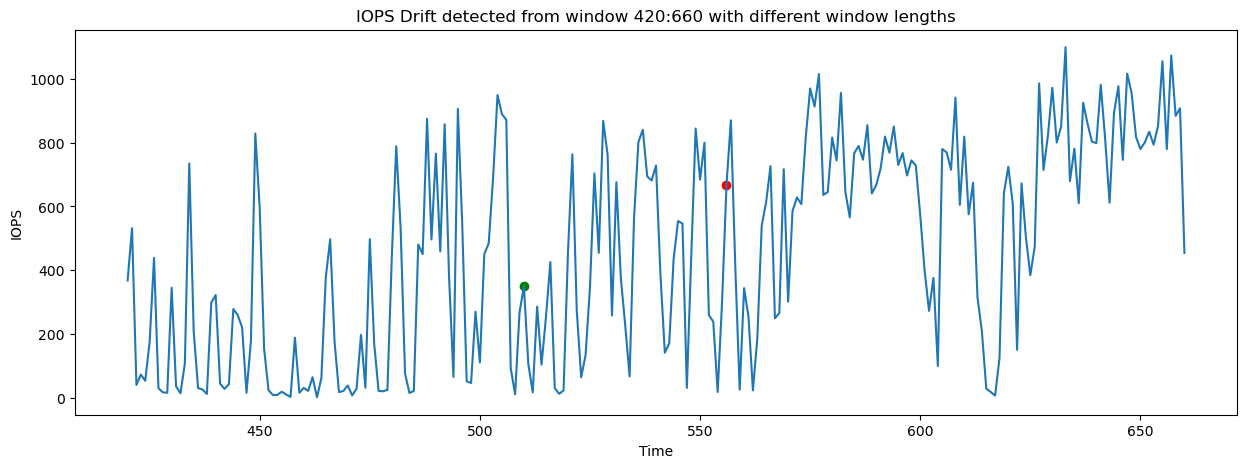

In [115]:
t = 136 + start # 50, 8
t2 = 90 + start # 30, 8
plt.figure(figsize=(15, 5))
plt.plot(data_segment)
plt.scatter(t, data_segment[t], color='red')
plt.scatter(t2, data_segment[t2], color='green')

plt.title(f'IOPS Drift detected from window {start}:{end} with different window lengths')
plt.xlabel('Time')
plt.ylabel('IOPS')

Text(0, 0.5, 'IOPS')

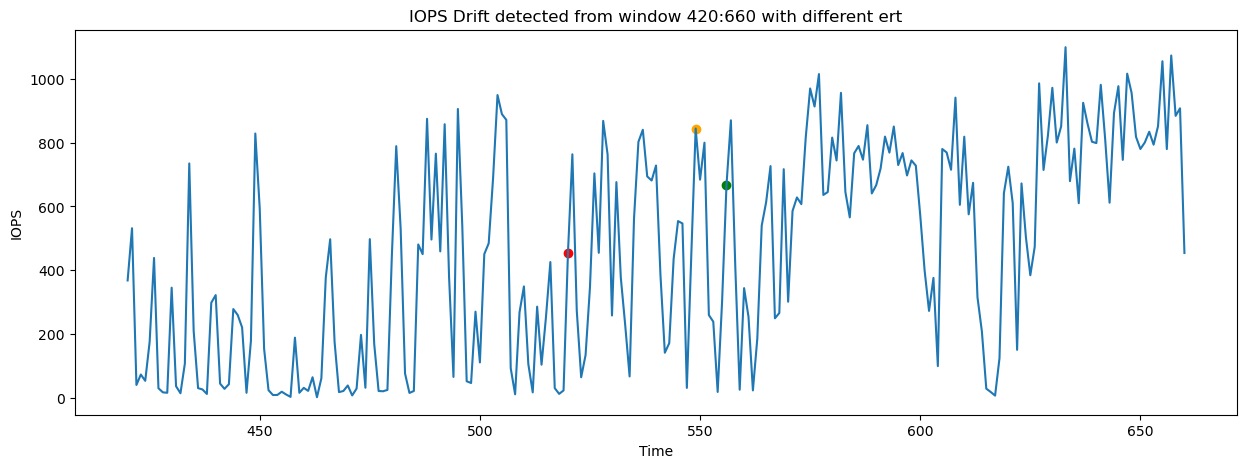

In [123]:
t = 100 + start # 50, 5
t2 = 136 + start # 50, 8
t3 = 129 + start # 50, 7
plt.figure(figsize=(15, 5))
plt.plot(data_segment)
plt.scatter(t, data_segment[t], color='red')
plt.scatter(t2, data_segment[t2], color='green')
plt.scatter(t3, data_segment[t3], color='orange')

plt.title(f'IOPS Drift detected from window {start}:{end} with different ert')
plt.xlabel('Time')
plt.ylabel('IOPS')